# Comparing Different Ride Company Prices 

## Introduction 
The idea of this project came with the two main ride application companies in the US which are Uber and Lyft. I believe it is interesting to evaluate the price of these two companies based on different factors (such as rain, humidity, timestamp, etc) and understand how they both compete with one another, but also, the relevent factors that can make clients pick on company over the other, if any. I think it will be a good analysis of the factors when it comes to pricing for those two applications.  

Questions to be answered: 
- Does different weather factors affect the price of rides? 
- which company (Uber, Lyft) tend to be the most pricey? 
- What are the top main factors when calculating the price?
- Does time affect the price of the ride? If so, by how much? 

### Dataset 
The initial dataset for this project can be found here: https://www.kaggle.com/datasets/miteshsingh11/uber-lyft-dataset-for-dsem-33201

This dataset consists of the following features/columns (55 features): 
id, timestamp, hour, day, month, datetime, timezone, source, destination, cab_type, product_id, name, price, distance, surge_multiplier, latitude, longitude, temperature, apparentTemperature, short_summary, long_summary, precipIntensity, precipProbability, humidity, windSpeed, windGust, windGustTime, visibility, temperatureHigh, temperatureHighTime, temperatureLow, temperatureLowTime, apparentTemperatureHigh, apparentTemperatureHighTime, apparentTemperatureLow, apparentTemperatureLowTime, icon, dewPoint, pressure, windBearing, cloudCover, uvIndex, visibility.1, ozone, sunriseTime, sunsetTime, moonPhase, precipIntensityMax, uvIndexTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMin, apparentTemperatureMinTime

However, I will be mainly using the following features for the experiment and see what do delete and make relevant as I moved further (24 features)
- datetime
- timezone
- source
- destination
- cab_type
- name
- price
- distance
- surge_multiplier
- temperature
- short_summary
- precipIntensity
- precipProbability
- humidity
- windSpeed
- icon
- dewPoint
- pressure
- cloudCover
- uvIndex
- sunriseTime
- sunsetTime

## Pre-processing 
There are multiple features in this dataset and other things to clean up as well. I will be evaluating the next steps for preprocessing as I go and understand more about this dataset. I will start by evaluating the set, see if there are missing values, getting rid of some columns, and aiming for possible string data type columns to be numeric. 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
data = pd.read_csv('data/uber_lyft.csv')

In [42]:
df = pd.DataFrame(data)

In [43]:
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

        datetime          timezone            source    destination cab_type  \
0  12/16/18 9:30  America/New_York  Haymarket Square  North Station     Lyft   
1  11/27/18 2:00  America/New_York  Haymarket Square  North Station     Lyft   
2  11/28/18 1:00  America/New_York  Haymarket Square  North Station     Lyft   
3  11/30/18 4:53  America/New_York  Haymarket Square  North Station     Lyft   
4  11/29/18 3:49  America/New_York  Haymarket Square  North Station     Lyft   

   ... precipIntensityMax uvIndexTime  temperatureMin  temperatureMinTime  \
0  ...             0.1276  1544979600           39.89          1545012000   
1  ...             0.1300  1543251600           40.49          1543233600   
2  ...             0.1064  1543338000           35.36          1543377600   
3  ...             0.0000  1543507200           34.67          1543550400   
4  ...             0.0001  1543420800           33.10          1543402800   

   temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
0           43.68          1544968800                   33.73   
1           47.30          1543251600                   36.20   
2           47.55          1543320000                   31.04   
3           45.03          1543510800                   30.30   
4           42.18          1543420800                   29.11   

   apparentTemperatureMinTime  Unnamed: 55 Unnamed: 56  
0                  1545012000        38.07  1544958000  
1                  1543291200        43.92  1543251600  
2                  1543377600        44.12  1543320000  
3                  1543550400        38.53  1543510800  
4                  1543392000        35.75  1543420800  

[5 rows x 57 columns]

In [44]:
df.shape

(60392, 57)

In [45]:
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [46]:
df.drop_duplicates().reset_index(drop=True)

id     timestamp  hour  day  month  \
0      424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1      4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2      981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3      c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4      e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                     ...           ...   ...  ...    ...   
60387  f609d990-14fd-444b-963b-ee3876840cd8  1.543444e+09    22   28     11   
60388  232eb0c9-72cf-47f8-9f3f-525606be2a4f  1.543299e+09     6   27     11   
60389  37d33188-3c69-48bc-826f-9353bc021ca7  1.543418e+09    15   28     11   
60390  66a7e081-08c1-49c3-904e-e6cdce5d719e  1.544893e+09    16   15     12   
60391  69bdfa7a-a1ca-4b0f-a88c-215a611efea2  1.543324e+09    13   27     11   

             datetime          timezone            source    destination  \
0       12/16/18 9:30  America/New_York  Haymarket Square  North Station   
1       11/27/18 2:00  America/New_York  Haymarket Square  North Station   
2       11/28/18 1:00  America/New_York  Haymarket Square  North Station   
3       11/30/18 4:53  America/New_York  Haymarket Square  North Station   
4       11/29/18 3:49  America/New_York  Haymarket Square  North Station   
...               ...               ...               ...            ...   
60387  11/28/18 22:28  America/New_York     North Station         Fenway   
60388   11/27/18 6:12  America/New_York     North Station      North End   
60389  11/28/18 15:16  America/New_York     North Station      North End   
60390  12/15/18 16:50  America/New_York     North Station      North End   
60391  11/27/18 13:12  America/New_York     North Station      North End   

      cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0         Lyft  ...             0.1276  1544979600           39.89   
1         Lyft  ...             0.1300  1543251600           40.49   
2         Lyft  ...             0.1064  1543338000           35.36   
3         Lyft  ...             0.0000  1543507200           34.67   
4         Lyft  ...             0.0001  1543420800           33.10   
...        ...  ...                ...         ...             ...   
60387     Lyft  ...             0.0000  1543420800           33.85   
60388     Uber  ...             0.1064  1543338000           35.36   
60389     Uber  ...             0.0000  1543420800           33.70   
60390     Uber  ...             0.0075  1544893200           39.78   
60391     Uber  ...             0.1429  1543338000           36.37   

       temperatureMinTime  temperatureMax  temperatureMaxTime  \
0              1545012000           43.68          1544968800   
1              1543233600           47.30          1543251600   
2              1543377600           47.55          1543320000   
3              1543550400           45.03          1543510800   
4              1543402800           42.18          1543420800   
...                   ...             ...                 ...   
60387          1543399200           42.61          1543438800   
60388          1543377600           47.55          1543320000   
60389          1543399200           42.60          1543438800   
60390          1544929200           54.40          1544896800   
60391          1543377600           47.06          1543320000   

       apparentTemperatureMin  apparentTemperatureMinTime  Unnamed: 55  \
0                       33.73                  1545012000        38.07   
1                       36.20                  1543291200        43.92   
2                       31.04                  1543377600        44.12   
3                       30.30                  1543550400        38.53   
4                       29.11                  1543392000        35.75   
...                       ...                         ...          ...   
60387                   30.03          

There are many features I do not want to use for this experiment so I will be only keeping the ones I consider can be useful for the project. I will be deleting other columns as I go if need be. 

In [47]:
desired_features = ['datetime', 'source', 'destination', 'cab_type', 'name', 'price', 'distance', 
                    'surge_multiplier', 'temperature', 'precipIntensity', 'precipProbability',
                    'humidity', 'windSpeed', 'dewPoint', 'pressure', 'cloudCover', 'uvIndex',
                    'sunriseTime', 'sunsetTime']

df = df[desired_features]

In [48]:
df

datetime            source    destination cab_type          name  \
0       12/16/18 9:30  Haymarket Square  North Station     Lyft        Shared   
1       11/27/18 2:00  Haymarket Square  North Station     Lyft           Lux   
2       11/28/18 1:00  Haymarket Square  North Station     Lyft          Lyft   
3       11/30/18 4:53  Haymarket Square  North Station     Lyft  Lux Black XL   
4       11/29/18 3:49  Haymarket Square  North Station     Lyft       Lyft XL   
...               ...               ...            ...      ...           ...   
60387  11/28/18 22:28     North Station         Fenway     Lyft       Lyft XL   
60388   11/27/18 6:12     North Station      North End     Uber        UberXL   
60389  11/28/18 15:16     North Station      North End     Uber           WAV   
60390  12/15/18 16:50     North Station      North End     Uber         UberX   
60391  11/27/18 13:12     North Station      North End     Uber      UberPool   

       price  distance  surge_multiplier  temperature  precipIntensity  \
0        5.0      0.44               1.0        42.34           0.0000   
1       11.0      0.44               1.0        43.58           0.1299   
2        7.0      0.44               1.0        38.33           0.0000   
3       26.0      0.44               1.0        34.38           0.0000   
4        9.0      0.44               1.0        37.44           0.0000   
...      ...       ...               ...          ...              ...   
60387   16.5      3.26               1.0        40.43           0.0000   
60388   10.5      0.94               1.0        43.03           0.0674   
60389    7.0      0.94               1.0        41.24           0.0000   
60390    7.0      0.94               1.0        51.84           0.0000   
60391    5.5      0.94               1.0        44.94           0.0070   

       precipProbability  humidity  windSpeed  dewPoint  pressure  cloudCover  \
0                   0.00      0.68       8.66     32.70   1021.98        0.72   
1                   1.00      0.94      11.98     41.83   1003.97        1.00   
2                   0.00      0.75       7.33     31.10    992.28        0.03   
3                   0.00      0.73       5.28     26.64   1013.73        0.00   
4                   0.00      0.70       9.14     28.61    998.36        0.44   
...                  ...       ...        ...       ...       ...         ...   
60387               0.00      0.64       9.08     29.27    994.99        1.00   
60388               1.00      0.93      11.62     41.15    996.34        1.00   
60389               0.00      0.60       8.39     28.42    991.46        0.74   
60390               0.00      0.80       3.58     45.71   1021.39        0.48   
60391               0.61      0.94       5.23     43.32    988.09        1.00   

       uvIndex  sunriseTime  sunsetTime  
0            0   1544962084  1544994864  
1            0   1543232969  1543266992  
2            0   1543319437  1543353364  
3            0   1543492370  1543526114  
4            0   1543405904  1543439738  
...        ...          ...         ...  
60387        0   1543405936  1543439716  
60388        0   1543319437  1543353364  
60389        1   1543405934  1543439719  
60390        1   1544875679  1544908424  
60391        0   1543319471  1543353348  

[60392 rows x 19 columns]

Since price of the rides is the target value that we'll be trying to predict, I want to see the different ranges and stats info of it


In [49]:
df['price'].describe()

count    60392.000000
mean        16.558311
std          9.334517
min          2.500000
25%          9.000000
50%         13.500000
75%         22.500000
max         92.000000
Name: price, dtype: float64

In [50]:
df.dtypes

datetime              object
source                object
destination           object
cab_type              object
name                  object
price                float64
distance             float64
surge_multiplier     float64
temperature          float64
precipIntensity      float64
precipProbability    float64
humidity             float64
windSpeed            float64
dewPoint             float64
pressure             float64
cloudCover           float64
uvIndex                int64
sunriseTime            int64
sunsetTime             int64
dtype: object

I will be changing the datetime feature to be datetime data type for easier readability for the model and checking if the dataset is balanced with Uber and Lyft data

In [51]:
df['datetime'] = pd.to_datetime(df['datetime']).astype('int64')

# Normalizing the feature datetime for the linear regression model
df['datetime'] = (df['datetime'] - df['datetime'].mean()) / df['datetime'].std()

df.head()

C:\Users\dagon\AppData\Local\Temp\ipykernel_9652\4279704075.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime']).astype('int64')


datetime            source    destination cab_type          name  price  \
0  1.340969  Haymarket Square  North Station     Lyft        Shared    5.0   
1 -1.088163  Haymarket Square  North Station     Lyft           Lux   11.0   
2 -0.967623  Haymarket Square  North Station     Lyft          Lyft    7.0   
3 -0.695711  Haymarket Square  North Station     Lyft  Lux Black XL   26.0   
4 -0.827081  Haymarket Square  North Station     Lyft       Lyft XL    9.0   

   distance  surge_multiplier  temperature  precipIntensity  \
0      0.44               1.0        42.34           0.0000   
1      0.44               1.0        43.58           0.1299   
2      0.44               1.0        38.33           0.0000   
3      0.44               1.0        34.38           0.0000   
4      0.44               1.0        37.44           0.0000   

   precipProbability  humidity  windSpeed  dewPoint  pressure  cloudCover  \
0                0.0      0.68       8.66     32.70   1021.98        0.72   
1                1.0      0.94      11.98     41.83   1003.97        1.00   
2                0.0      0.75       7.33     31.10    992.28        0.03   
3                0.0      0.73       5.28     26.64   1013.73        0.00   
4                0.0      0.70       9.14     28.61    998.36        0.44   

   uvIndex  sunriseTime  sunsetTime  
0        0   1544962084  1544994864  
1        0   1543232969  1543266992  
2        0   1543319437  1543353364  
3        0   1543492370  1543526114  
4        0   1543405904  1543439738

In [52]:
# Normalizing pressure feature as well 
df['pressure'] = (df['pressure'] - df['pressure'].mean()) / df['pressure'].std()

df['pressure']

0        0.894094
1       -0.441336
2       -1.308141
3        0.282362
4       -0.857313
           ...   
60387   -1.107196
60388   -1.007095
60389   -1.368943
60390    0.850345
60391   -1.618827
Name: pressure, Length: 60392, dtype: float64

Understanding if dataset is balanced

In [53]:
df[df['cab_type'] == 'Uber'].shape

(30827, 19)

In [54]:
df[df['cab_type'] == 'Lyft'].shape

(29565, 19)

In [55]:
df['name'].nunique()

12

In [56]:
df = df.drop(['source', 'destination', 'sunsetTime', 'sunriseTime'], axis=1)

Changing the values of cab type (Uber, Lyft) to be Uber = 0 and Lyft =  1 for easier interpretation for the model

In [57]:
df['cab_type'] = df['cab_type'].map({'Uber':0,
                                     'Lyft':1})

In [58]:
df.head()

datetime  cab_type          name  price  distance  surge_multiplier  \
0  1.340969         1        Shared    5.0      0.44               1.0   
1 -1.088163         1           Lux   11.0      0.44               1.0   
2 -0.967623         1          Lyft    7.0      0.44               1.0   
3 -0.695711         1  Lux Black XL   26.0      0.44               1.0   
4 -0.827081         1       Lyft XL    9.0      0.44               1.0   

   temperature  precipIntensity  precipProbability  humidity  windSpeed  \
0        42.34           0.0000                0.0      0.68       8.66   
1        43.58           0.1299                1.0      0.94      11.98   
2        38.33           0.0000                0.0      0.75       7.33   
3        34.38           0.0000                0.0      0.73       5.28   
4        37.44           0.0000                0.0      0.70       9.14   

   dewPoint  pressure  cloudCover  uvIndex  
0     32.70  0.894094        0.72        0  
1     41.83 -0.441336        1.00        0  
2     31.10 -1.308141        0.03        0  
3     26.64  0.282362        0.00        0  
4     28.61 -0.857313        0.44        0

In [59]:
df = pd.get_dummies(df, columns=['name'], dtype=int)

## Visualizations 

Understanding the data and hte patterns it has in relationship to one another. I also want to check if there are any outliers or more data cleaning to do before the modeling section

C:\Users\dagon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


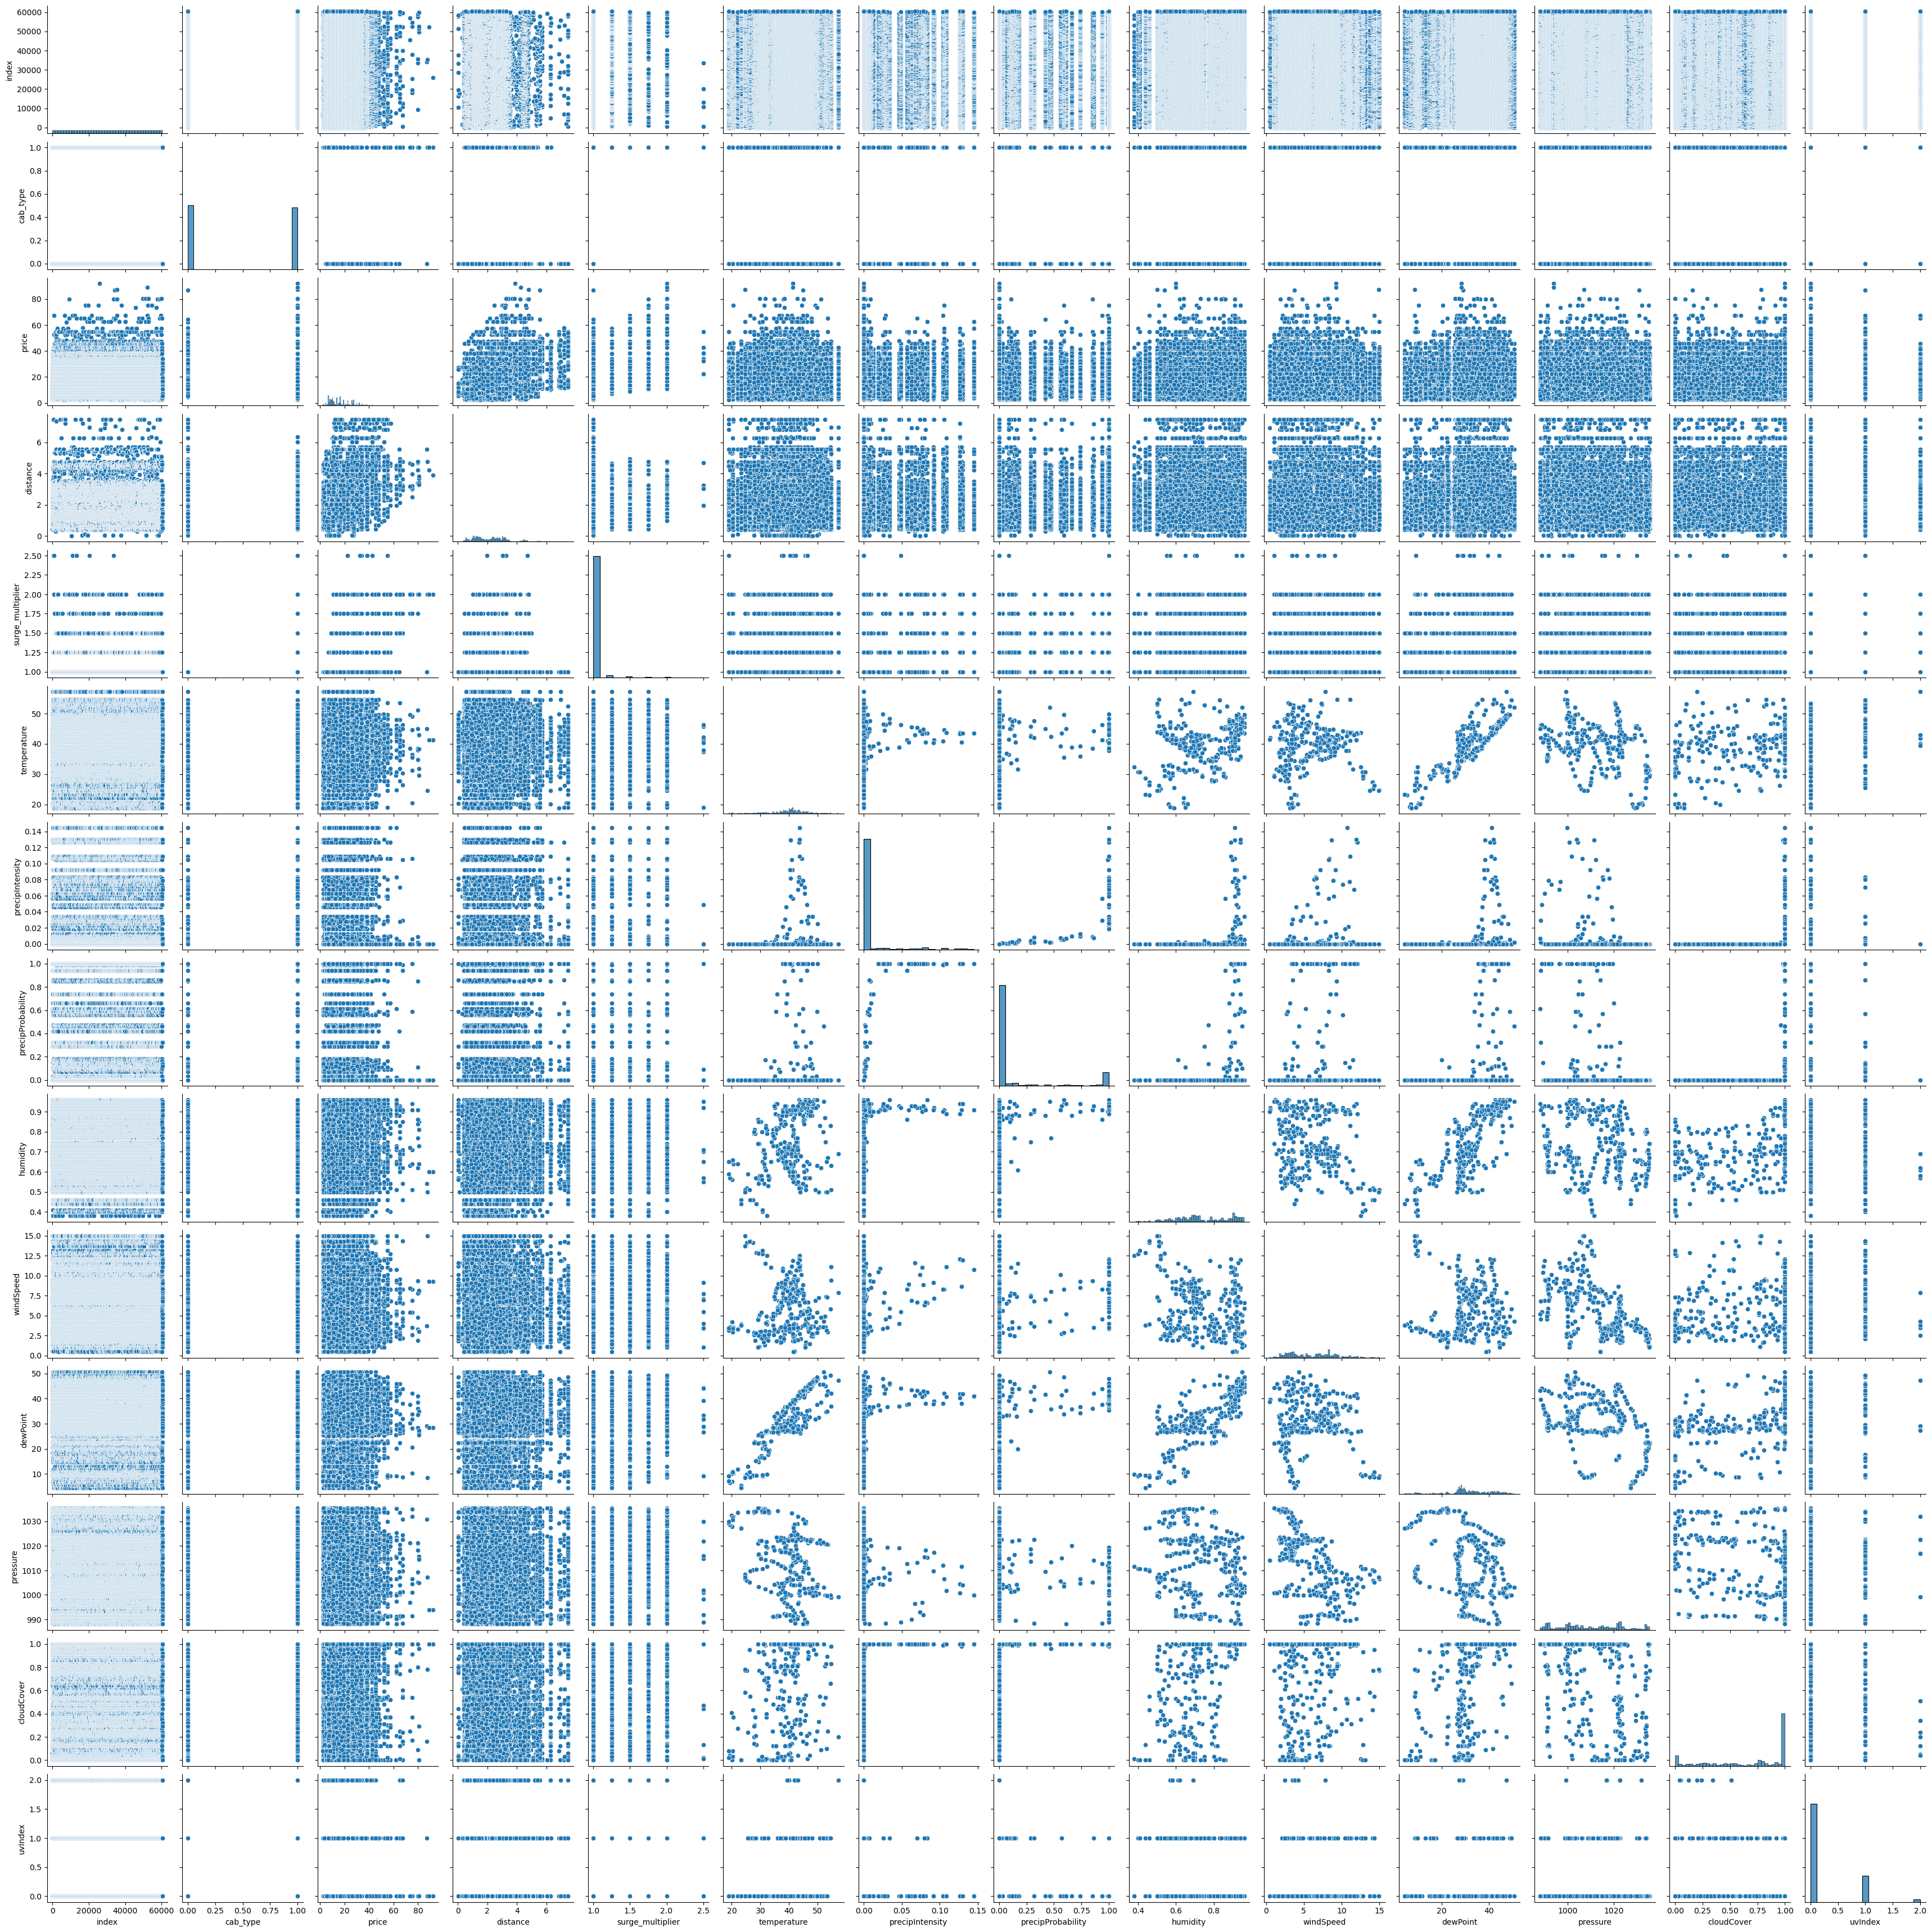

In [150]:
sns.pairplot(df)

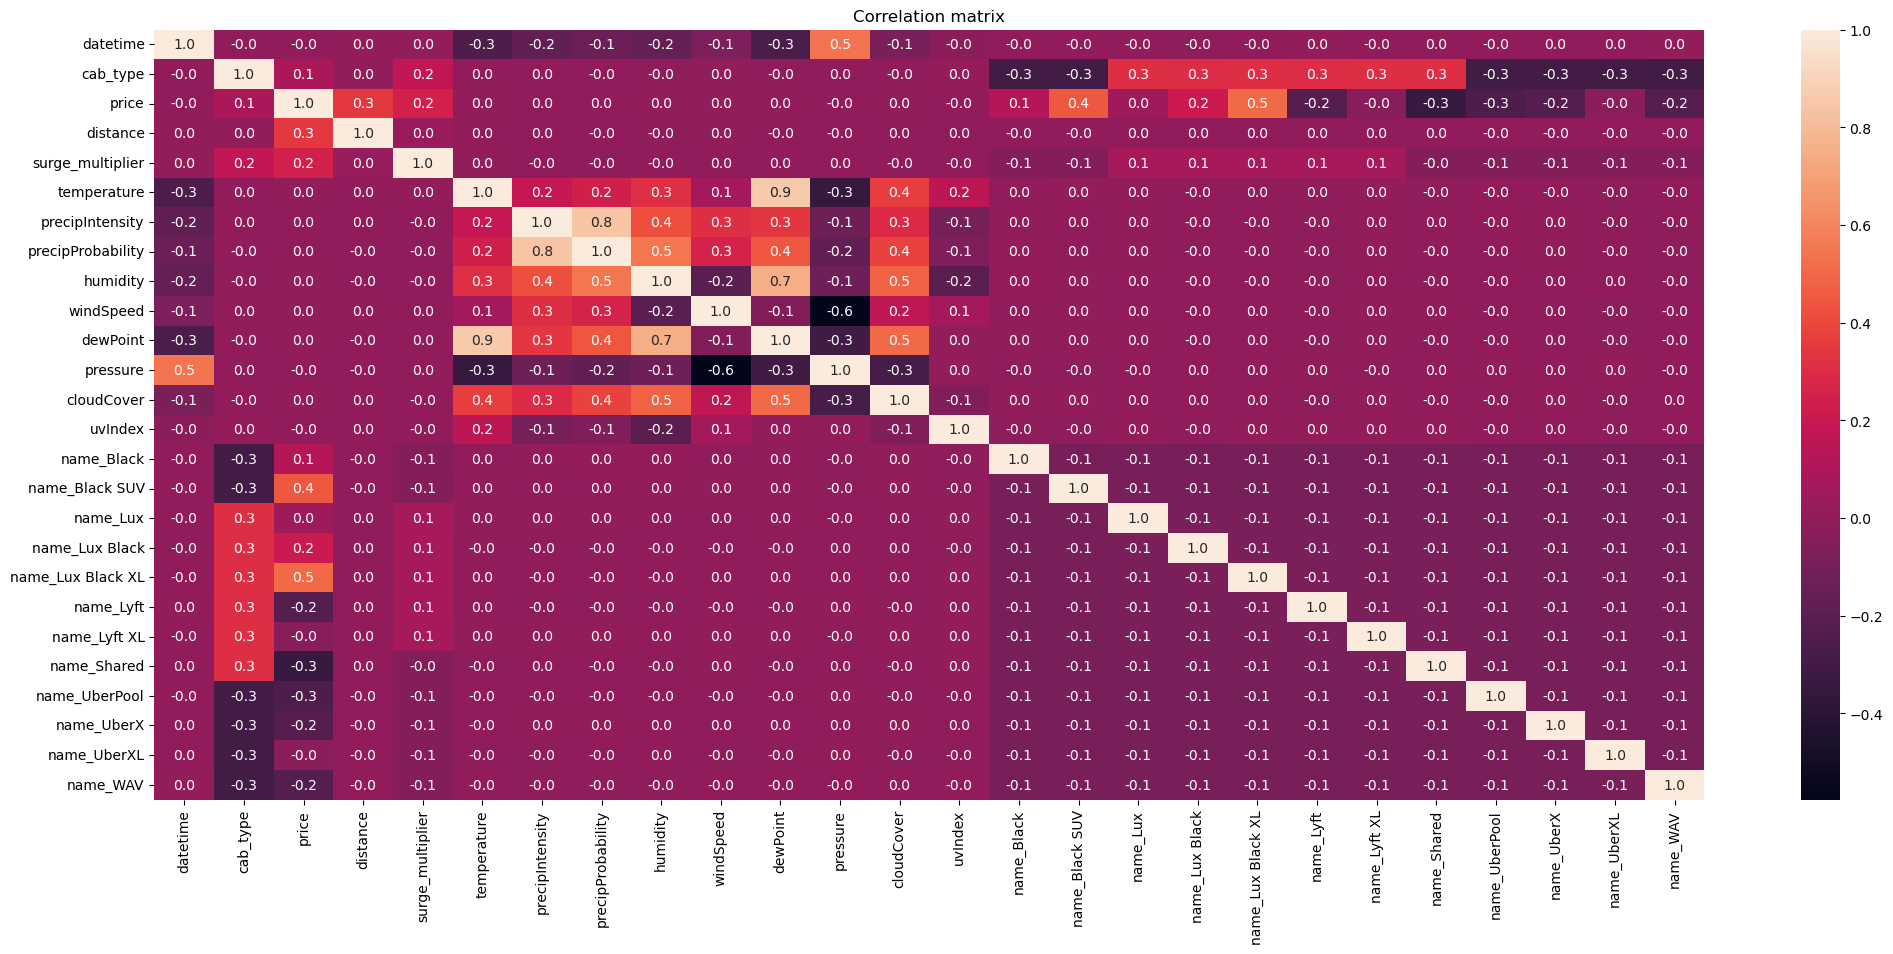

In [60]:
# correlation matrix
corr_matrix = df.corr()

# Setting up the heatmap 
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.1f')
plt.title('Correlation matrix')

plt.show()

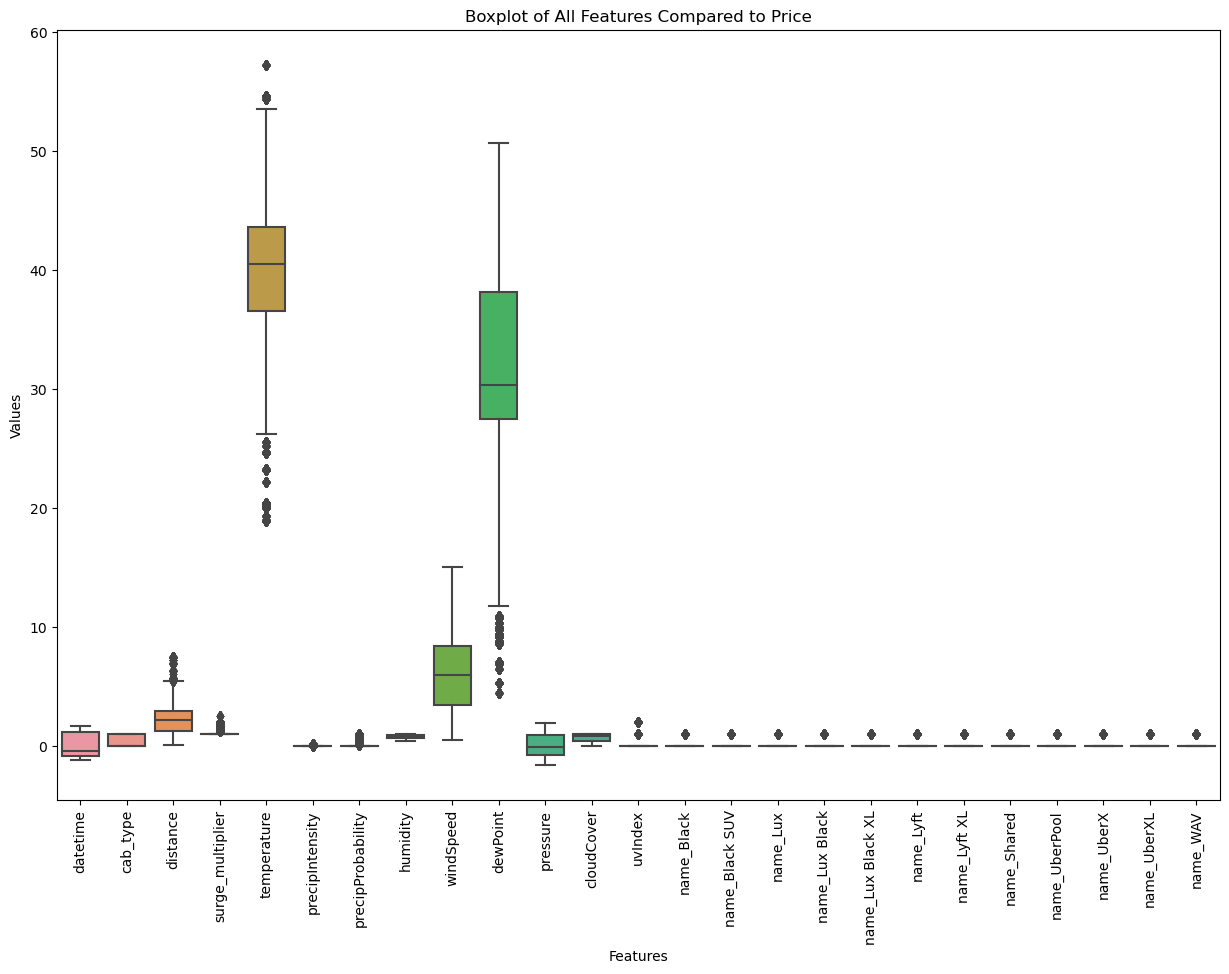

In [61]:
# Melt the DataFrame to long format for seaborn boxplot
df_melted = df.melt(id_vars='price', var_name='Features', value_name='Values')

# Create a boxplot of all features compared to the price feature
plt.figure(figsize=(15, 10))
sns.boxplot(x='Features', y='Values', data=df_melted)
plt.xticks(rotation=90)
plt.title('Boxplot of All Features Compared to Price')
plt.show()

## Modeling 
This project will be using linear regression and experiment with other different types of regression models to understand the effeciency of each one and work around them. 

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# features
X = df.drop(columns=['price'])
# target
y = df['price']

In [64]:
X.shape

(60392, 25)

In [65]:
y.shape

(60392,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

### Test Run
Since the dataset has multiple features, I want to test different types of regression models and techniques to see which one adapts better.

#### Linear Regression

In [67]:
model = LinearRegression()

In [68]:
model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE value: {mse}, R2 value: {r2}')

MSE value: 6.014110889705524, R2 value: 0.9299675425015471


The score for this models is quite good (~0.93). However, I think there are other regression models that can adapt more to this type of data

#### To Be Continued with other experiments